# PUI Fall 2017 HW 5-1
### Yuwen Chang (ywc249)
### October 2017
### Objective: test the Z test

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:" data-toc-modified-id="Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using:</a></div><div class="lev1 toc-item"><a href="#AD-and-KS-test" data-toc-modified-id="AD-and-KS-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>AD and KS test</a></div><div class="lev2 toc-item"><a href="#KS:-high-p-value-pvalue&gt;0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected" data-toc-modified-id="KS:-high-p-value-pvalue>0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KS: high p-value pvalue&gt;0.05: H0 that sample comes from a Gaussian distribution cannot be rejected</a></div><div class="lev2 toc-item"><a href="#AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected." data-toc-modified-id="AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected.-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax MathJax_Processing" id="MathJax-Element-2-Frame" tabindex="0"></span><script type="math/tex" id="MathJax-Element-2">alpha</script>=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.</a></div><div class="lev1 toc-item"><a href="#try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)" data-toc-modified-id="try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)</a></div><div class="lev1 toc-item"><a href="#KL-DIVERGENCE" data-toc-modified-id="KL-DIVERGENCE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>KL DIVERGENCE</a></div><div class="lev1 toc-item"><a href="#BINOMIAL---INSTRUCTIONS-for-assignment" data-toc-modified-id="BINOMIAL---INSTRUCTIONS-for-assignment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>BINOMIAL - INSTRUCTIONS for assignment</a></div><div class="lev2 toc-item"><a href="#WRITE-A-CAPTION-HERE-IN-THIS-CELL.." data-toc-modified-id="WRITE-A-CAPTION-HERE-IN-THIS-CELL..-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>WRITE A CAPTION HERE IN THIS CELL..</a></div><div class="lev1 toc-item"><a href="#POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution" data-toc-modified-id="POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution</a></div><div class="lev1 toc-item"><a href="#NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number" data-toc-modified-id="NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number</a></div>

# Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 

1) KS: generate the distribution against which you can test against a normal (Gaussian) distribution

2) AD: generate the distribution against which you can test against a normal (Gaussian) distribution

3) KL divergence test: no package

4) Pearson's chisq test: no package

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as st

%pylab inline

Populating the interactive namespace from numpy and matplotlib


http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

# KS and AD test

## Test against Gaussian:
1. Gaussian (mean = 0, std = 1)
2. Poisson with small $\lambda$
3. Binomial with small $np$

In [3]:
# generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

# test ks and ad
print ("normal on normal", st.kstest(dist_n,'norm'))
print ("normal on normal", st.anderson(dist_n, dist='norm'))

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


## Results

## $H_0$: the sample comes from a Gaussian distribution
## $\alpha = 0.05$

### KS: high p-value > 0.05: cannot be rejected

### AD: statistics = 0.26 < the 0.784 critical value for $\alpha$=0.05: cannot be rejected

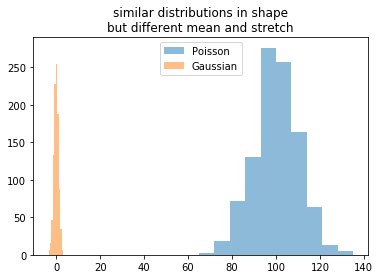

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


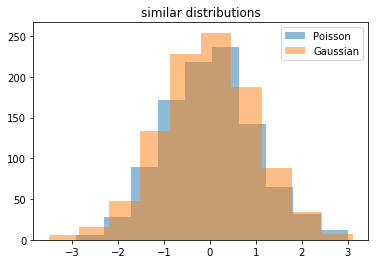

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: higher p-value: does not reject the H0 at alpha=0.05
AD: statistics AD=0.926 larger than threshold (for alpha=0.05): reject H0
thresh_0.05 = 0.784


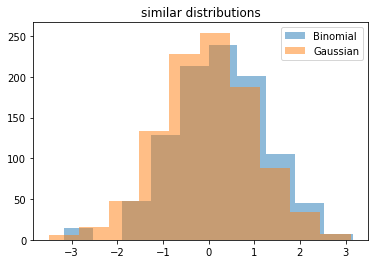

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456609, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: low p-value: rejects the H0 at alpha=0.05
AD: statistics AD=15.852 larger than threshold (for alpha=0.05): rejects H0


In [11]:
np.random.seed(999)

# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", st.kstest(dist_p,'norm'))
print ("poisson on normal", st.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 

# poisson fixed to mean = 0, sd = 1
dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

# print test result
print ("poisson vs normal", st.kstest(dist_p,'norm'))
print ("poisson vs normal", st.anderson(dist_p, dist='norm'))
print ("KS: higher p-value: does not reject the H0 at alpha=0.05") 
print ("AD: statistics AD=0.926 larger than threshold (for alpha=0.05): rejects H0") 

threshold = st.anderson(dist_n, dist='norm')[1] \
           [st.anderson(dist_n, dist='norm')[2]==[5.0]]
print ("thresh_0.05 = %.3f"%threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean, divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

# print test result
print ("binomial vs normal", st.kstest(dist_b,'norm'))
print ("binomial vs normal", st.anderson(dist_b, dist='norm'))
print ("KS: low p-value: rejects the H0 at alpha=0.05") 
print ("AD: statistics AD=15.852 larger than threshold (for alpha=0.05): rejects H0")

# Null hypothesis
- KS: two distributions are identical
- AD: a sample is drawn from a population that follows a particular distribution

# KL DIVERGENCE

KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

__ empirical distribution__: requires the distribution _y_ value at location _x_.
pass the values of the _distribution_ at some x's, not my histogram though, if I need a  **NORMALIZED HISTOGRAM OF MY DISTRIBUTION**, i.e. derive a probability distribution function (PDF) from the data. 

__model__: then pass a function for my comparison distribution evaluated at the same _x_-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)

In [12]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

# Notice: the extra comma on the left side of the '=' sign: 
# that tells numpy take the first two values returned, and throw away the rest

array([-3.50760164, -2.84558484, -2.18356804, -1.52155124, -0.85953444,
       -0.19751764,  0.46449916,  1.12651596,  1.78853276,  2.45054955,
        3.11256635])

then pass it the functional form of a normal PDF, returned by the scipy.stats.norm, for example, evaluated at the bin centers of the histogram from before

In [15]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy".\n' + 
       "To figure out what the number means though in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
       st.entropy(distpdf_n, st.norm.pdf(bincenters_n)))
print ("poisson on normal", 
       st.entropy(distpdf_p, st.norm.pdf(bincenters_p)))
print ("binomial on normal", 
       st.entropy(distpdf_b, st.norm.pdf(bincenters_p)))

# you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy".
To figure out what the number means though in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


# Binomial

In [16]:
np.random.seed(999)

# loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 # parameter for the binomial, my arbitrary choice
    # generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1 - p))
    # run the tests. 
    ks_s_b[i] = st.kstest(dist,'norm')[0]
    ks_p_b[i] = st.kstest(dist,'norm')[1]
    #print (st.kstest(dist,'norm'))
    #print (st.anderson(dist, dist='norm'))
    ad_b[i] = st.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    # when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    st.norm.pdf(bincenters) + n)
    

NameError: name 'narray' is not defined

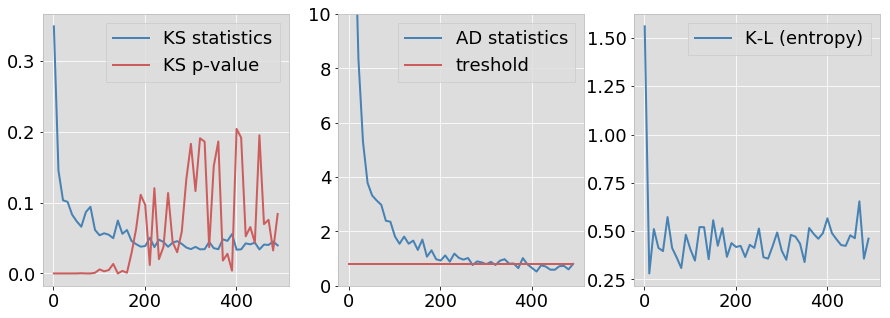

In [89]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();

You want to see how the p-value (or the test statistics) behaves as a function of increasing n*p.
So you can plot the p-value (or the test statistics) against the n*p
think about how the captions are written in the paper

## WRITE A CAPTION HERE IN THIS CELL..

# Poisson

increase lambda

/Users/Yuwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/Yuwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


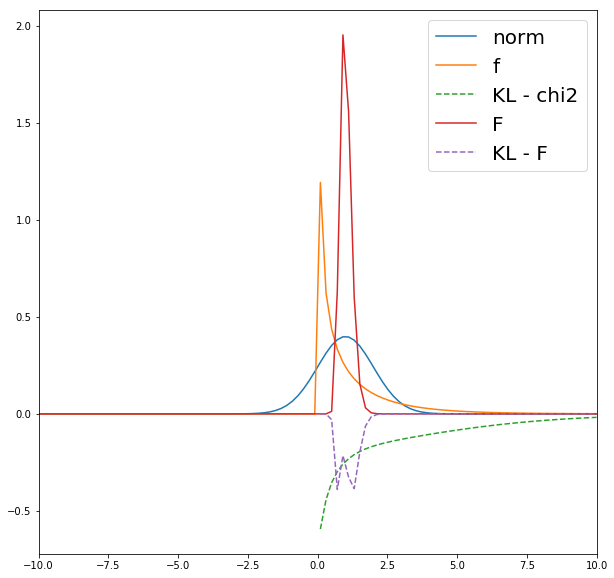

In [17]:
pl.figure(figsize=(10,10))

q = lambda x, mu : st.distributions.norm.pdf(x - mu)
c = lambda x, mu : st.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : st.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);

Generate N samples from a distribution of your choice,with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).


plot your original distribution

plot at least one of the samples

plot the distribution of z statistics

fit the z-statistics with a gaussian model and assess the goodnes of fit with a simple test (AD or KS).

find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

plots need have caption, axis labels, and comment your figures and test results appropriately

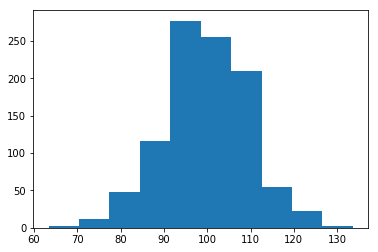

In [26]:
normal = st.norm.rvs(loc=100,scale=10,size=1000)
pl.hist(normal);

In [27]:
def calc_z(norm, mu=100, std=10):
    z = np.sqrt(len(norm)) * (mu - norm.mean()) / (std)
    return z

In [28]:
calc_z(normal)

0.69102439812001415

In [29]:
np.random.seed(10)
z = np.empty(1000)
for i in range(0, 1000):
    z[i] = calc_z(st.norm.rvs(loc=100, scale=10, size=1000))
z

array([  4.60321236e-01,   3.50745021e-01,   6.65782412e-01,
         1.81824932e+00,   1.23449968e+00,   1.41533540e-01,
        -7.50800941e-01,  -1.56171332e+00,  -2.45256448e+00,
        -1.51946424e+00,  -9.21192431e-01,   5.28774659e-01,
         8.21333761e-02,   4.04930219e-01,   6.72149201e-01,
         6.39930672e-01,  -4.34439547e-01,  -4.95232445e-02,
        -5.29744806e-01,   1.62142390e+00,  -3.93528610e-01,
         1.26947379e+00,   2.57361485e-01,  -8.17453416e-01,
         1.03042722e+00,   1.80762541e-01,  -5.39038358e-01,
        -3.59338524e-01,   7.01037555e-01,  -6.13746249e-01,
        -4.58754362e-01,  -4.41391781e-01,  -6.41395587e-01,
         5.53113893e-01,  -2.08171269e+00,   9.26893104e-01,
         3.82496543e-01,  -2.06343787e+00,  -8.50633518e-01,
         1.38253574e-02,  -1.07394343e+00,  -1.27033229e-01,
         1.17929455e+00,   1.20241116e+00,  -2.32073040e-01,
         6.98382485e-01,  -5.15604444e-01,  -1.02731666e+00,
        -1.15356168e+00,

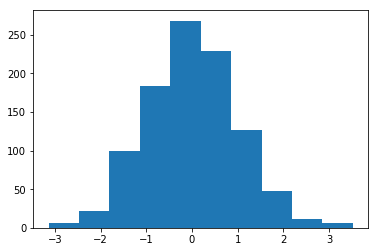

In [31]:
pl.hist(z);

In [33]:
st.kstest(z,'norm')

KstestResult(statistic=0.015500100716127896, pvalue=0.96989408286333612)

In [35]:
st.kstest?

In [41]:
y = np.zeros((2,3))
y

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])